## Linear response: Duffing oscillator

Here we calculate the linear response of a strongly-driven Duffing resonator as presented in https://doi.org/10.1103/PhysRevX.10.021066.

We use the Jacobian of the harmonic equations as explained here: https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/examples/linear_response/

In [1]:
using HarmonicBalance
import HarmonicBalance.LinearResponse.plot_linear_response
HarmonicBalance.Plots.default(size=(370,270))
@variables α, ω, ω0, F, γ, t, x(t); # declare constant variables and a function x(t)

In [2]:
# define ODE
diff_eq = DifferentialEquation(d(x,t,2) + ω0*x + α*x^3 + γ*d(x,t) ~ F*cos(ω*t), x)

# specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, ω) 

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: α, ω, γ, ω0, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

ω0*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) - (ω^2)*u1(T) ~ F

ω0*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) ~ 0


## weak driving - quasilinear regime


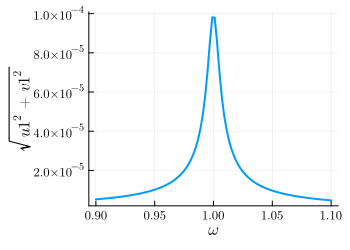

In [24]:
fixed = (α => 1, ω0 => 1.0, γ => 1E-2, F => 1E-6)   # fixed parameters
varied = ω => LinRange(0.9, 1.1, 100)           # range of parameter values
result = get_steady_states(harmonic_eq, varied, fixed)

plot(result, "sqrt(u1^2 + v1^2)", legend=false, size=(350,250))

In [25]:
savefig("figs/linear_response/quasilin_amp.png")

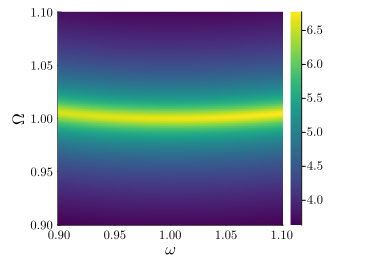

In [26]:
plot_linear_response(result, x, branch=1, 
    Ω_range=LinRange(0.9,1.1,300), order=1, logscale=true)

In [27]:
savefig("figs/linear_response/quasilin_noise.png")

In [28]:
#display the underlying structure
HarmonicBalance.LinearResponse.JacobianSpectrum(result, index=1, branch=1)[x]

Lorentzian peaks (central frequency ω0, linewidth Γ): 
-2.220e-16 * L(ω0 = 7.944755e-01, Γ = -5.586e-03)
0.000e+00 * L(ω0 = 7.944755e-01, Γ = -5.586e-03)
2.000e+00 * L(ω0 = 1.005525e+00, Γ = -5.586e-03)
2.000e+00 * L(ω0 = 1.005525e+00, Γ = -5.586e-03)


# strong drive - nonlinear regime

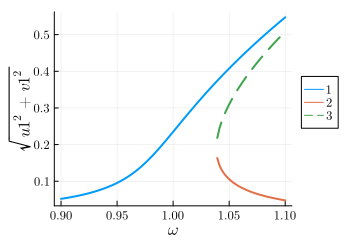

In [29]:
fixed = (α => 1, ω0 => 1.0, γ => 1E-2, F => 1e-2)   # fixed parameters
varied = ω => LinRange(0.9, 1.1, 100)           # range of parameter values
result = get_steady_states(harmonic_eq, varied, fixed)

plot(result, "sqrt(u1^2 + v1^2)", size=(350,250))

In [30]:
savefig("figs/linear_response/nonlin_amp.png")

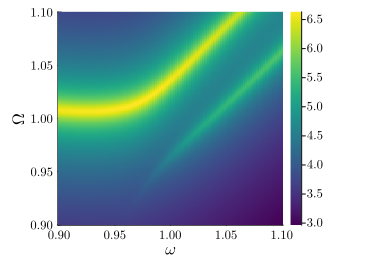

In [31]:
p1 = plot_linear_response(result, x, branch=1, 
    Ω_range=LinRange(0.9,1.1,300), order=1, logscale=true)

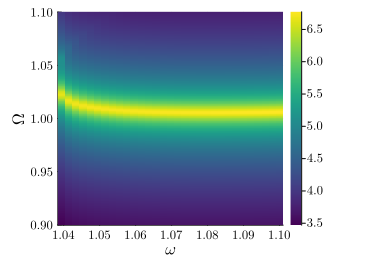

In [32]:
p2 = plot_linear_response(result, x, branch=2, 
    Ω_range=LinRange(0.9,1.1,300), order=1, logscale=true)

In [33]:
plot(p1, p2, size=(800,200))
savefig("figs/linear_response/nonlin_noise.png")

## response vs drive amplitude on resonance

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /Users/jdelpino_ethz/.julia/packages/Plots/W75kY/src/args.jl:1677


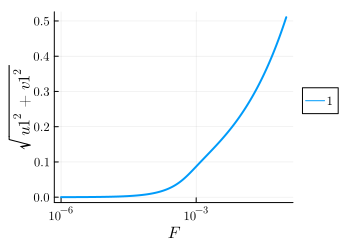

In [34]:
fixed = (α => 1., ω0 => 1.0, γ => 1E-2, ω => 1)   # fixed parameters
varied = F => 10 .^ LinRange(-6, -1, 200)           # range of parameter values
result = get_steady_states(harmonic_eq, varied, fixed)

plot(result, "sqrt(u1^2 + v1^2)", xscale=:log, size=(350,250))

In [35]:
savefig("figs/linear_response/nonlin_F_amp.png")

## linear response to white noise vs drive amplitude 
a single stable branch was found - let's obtain its linear response via the Jacobian

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /Users/jdelpino_ethz/.julia/packages/Plots/W75kY/src/args.jl:1677


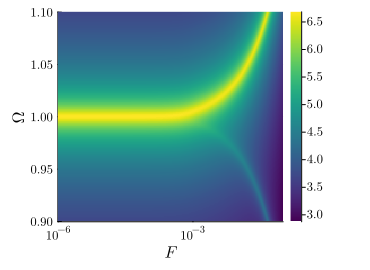

In [36]:
plot_linear_response(result, x, branch=1, 
    Ω_range=LinRange(0.9,1.1,300), order=1, logscale=true, xscale=:log)

In [37]:
savefig("figs/linear_response/nonlin_F_noise.png")